# ZPIC Python interface

This notebook illustrates the use of the ZPIC Python interface.

Calling ZPIC from Python require importing the appropriate ZPIC module (in this case em1d), and NumPy

In [1]:
import em1d
import numpy as np

Initializing a ZPIC simulation requires setting the simulation box and timestep

In [2]:
nx = 120
box = 4 * np.pi
dt = 0.1
tmax = 50.0

ndump = 10

Next we need to describe the particle species in the simulation. In this example we are using 2 species:

In [3]:
ppc = 500
ufl = [0.2,    0.0,  0.0]
uth = [0.001,0.001,0.001]

right = em1d.Species( "right", -1.0, ppc, ufl, uth )

ufl[0] = -ufl[0]
left  = em1d.Species( "left", -1.0, ppc, ufl, uth )

We can now initialize the simulation

In [4]:
sim = em1d.Simulation( nx, box, dt, tmax, [right,left])

Diagnostics are defined in a python function that accepts as a single argument a simulation object. Global variables can also be accessed from this routine:

In [8]:
def report( sim ):
    # sim.n has the current simulation iteration
    if (sim.n % ndump == 0):
        right.report(em1d.Species.particles)
        left.report(em1d.Species.particles)
        sim.emf.report(em1d.EMF.efld,0)

To run the simulation use the `run` method, giving the diagnostics function as the sole parameter:

In [6]:
sim.run(report)

Starting simulation...
n = 0, t = 0
n = 1, t = 0.1
n = 2, t = 0.2
n = 3, t = 0.3
n = 4, t = 0.4
n = 5, t = 0.5
n = 6, t = 0.6
n = 7, t = 0.7
n = 8, t = 0.8
n = 9, t = 0.9
n = 10, t = 1
n = 11, t = 1.1
n = 12, t = 1.2
n = 13, t = 1.3
n = 14, t = 1.4
n = 15, t = 1.5
n = 16, t = 1.6
n = 17, t = 1.7
n = 18, t = 1.8
n = 19, t = 1.9
n = 20, t = 2
n = 21, t = 2.1
n = 22, t = 2.2
n = 23, t = 2.3
n = 24, t = 2.4
n = 25, t = 2.5
n = 26, t = 2.6
n = 27, t = 2.7
n = 28, t = 2.8
n = 29, t = 2.9
n = 30, t = 3
n = 31, t = 3.1
n = 32, t = 3.2
n = 33, t = 3.3
n = 34, t = 3.4
n = 35, t = 3.5
n = 36, t = 3.6
n = 37, t = 3.7
n = 38, t = 3.8
n = 39, t = 3.9
n = 40, t = 4
n = 41, t = 4.1
n = 42, t = 4.2
n = 43, t = 4.3
n = 44, t = 4.4
n = 45, t = 4.5
n = 46, t = 4.6
n = 47, t = 4.7
n = 48, t = 4.8
n = 49, t = 4.9
n = 50, t = 5
n = 51, t = 5.1
n = 52, t = 5.2
n = 53, t = 5.3
n = 54, t = 5.4
n = 55, t = 5.5
n = 56, t = 5.6
n = 57, t = 5.7
n = 58, t = 5.8
n = 59, t = 5.9
n = 60, t = 6
n = 61, t = 6.1
n = 62, t

n = 477, t = 47.7
n = 478, t = 47.8
n = 479, t = 47.9
n = 480, t = 48
n = 481, t = 48.1
n = 482, t = 48.2
n = 483, t = 48.3
n = 484, t = 48.4
n = 485, t = 48.5
n = 486, t = 48.6
n = 487, t = 48.7
n = 488, t = 48.8
n = 489, t = 48.9
n = 490, t = 49
n = 491, t = 49.1
n = 492, t = 49.2
n = 493, t = 49.3
n = 494, t = 49.4
n = 495, t = 49.5
n = 496, t = 49.6
n = 497, t = 49.7
n = 498, t = 49.8
n = 499, t = 49.9
n = 500, t = 50

Simulation completed.


Simulation results are saved in the ZDF format, as in normal ZPIC simulations, and can now be visualized in the noteboook

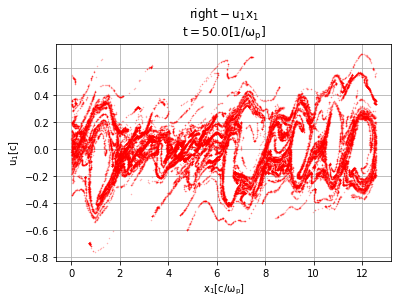

In [7]:
import zdf
import matplotlib.pyplot as plt

(particles,info) = zdf.read_particles("PARTICLES/particles-right-000500.zdf")

x = particles['x1']
y = particles['u1']

plt.plot(x, y, 'r.', ms=1,alpha=0.3)

t = str(info["iteration"]["t"])
tunits = str(info["iteration"]["tunits"])

title = info['particles']['name'] + '-  u_1 x_1'

timeLabel = r'$\sf{t = ' + t + ' [' + tunits + r']}$'
plt.title(r'$\sf{' + title + r'}$' + '\n' + timeLabel)

xlabel = 'x_1' + '[' + info['particles']['units']['x1'] + ']'
ylabel = 'u_1' + '[' + info['particles']['units']['u1'] + ']'

plt.xlabel(r'$\sf{' + xlabel + r'}$')
plt.ylabel(r'$\sf{' + ylabel + r'}$')

plt.grid(True)

plt.show()